In [6]:
import numpy as np
import scipy.stats as sps
import simulate as sim
from importlib import reload
import matplotlib.pyplot as plt
import particle_filter as pf

In [2]:
# S0 = 149.54
S0 = 100
T = 30
# r = 0.0245
r = 0.2
q = 0
N = 1000

dt = 1/250

In [192]:
# true_params = [r, 2.2, 0.01, 0.3, -0.6, 0.02]
true_params = [0.1, 3, 0.1, 0.4, -0.2, 0.25]

In [206]:
y = sim.simulate_heston_state(true_params, S0, N=1000) 

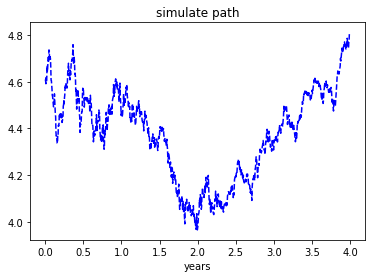

In [207]:
years = np.arange(y.shape[-1]-1) * (1/250)
plt.plot(years, y[0,1:].T, 'b--')
plt.title('simulate path')
plt.xlabel('years')
plt.show()

In [209]:
reload(pf)

<module 'particle_filter' from '/Users/Mason/Desktop/Columbia/computational-methods-in-finance/cfinance-filtering/particle_filter.py'>

In [210]:
pf_heston = pf.PFHeston(np.array(y[0, :])[0], N=2000)

# Plot Results

In [189]:
obs, hidden = pf_heston.filter(np.array(y[0, :])[0], true_params)

done with step: 1
done with step: 2
done with step: 3
done with step: 4
done with step: 5
done with step: 6
done with step: 7
done with step: 8
done with step: 9
done with step: 10
done with step: 11
done with step: 12
done with step: 13
done with step: 14
done with step: 15
done with step: 16
done with step: 17
done with step: 18
done with step: 19
done with step: 20
done with step: 21
done with step: 22
done with step: 23
done with step: 24
done with step: 25
done with step: 26
done with step: 27
done with step: 28
done with step: 29
done with step: 30
done with step: 31
done with step: 32
done with step: 33
done with step: 34
done with step: 35
done with step: 36
done with step: 37
done with step: 38
done with step: 39
done with step: 40
done with step: 41
done with step: 42
done with step: 43
done with step: 44
done with step: 45
done with step: 46
done with step: 47
done with step: 48
done with step: 49
done with step: 50
done with step: 51
done with step: 52
done with step: 53
do

done with step: 417
done with step: 418
done with step: 419
done with step: 420
done with step: 421
done with step: 422
done with step: 423
done with step: 424
done with step: 425
done with step: 426
done with step: 427
done with step: 428
done with step: 429
done with step: 430
done with step: 431
done with step: 432
done with step: 433
done with step: 434
done with step: 435
done with step: 436
done with step: 437
done with step: 438
done with step: 439
done with step: 440
done with step: 441
done with step: 442
done with step: 443
done with step: 444
done with step: 445
done with step: 446
done with step: 447
done with step: 448
done with step: 449
done with step: 450
done with step: 451
done with step: 452
done with step: 453
done with step: 454
done with step: 455
done with step: 456
done with step: 457
done with step: 458
done with step: 459
done with step: 460
done with step: 461
done with step: 462
done with step: 463
done with step: 464
done with step: 465
done with step: 466


done with step: 827
done with step: 828
done with step: 829
done with step: 830
done with step: 831
done with step: 832
done with step: 833
done with step: 834
done with step: 835
done with step: 836
done with step: 837
done with step: 838
done with step: 839
done with step: 840
done with step: 841
done with step: 842
done with step: 843
done with step: 844
done with step: 845
done with step: 846
done with step: 847
done with step: 848
done with step: 849
done with step: 850
done with step: 851
done with step: 852
done with step: 853
done with step: 854
done with step: 855
done with step: 856
done with step: 857
done with step: 858
done with step: 859
done with step: 860
done with step: 861
done with step: 862
done with step: 863
done with step: 864
done with step: 865
done with step: 866
done with step: 867
done with step: 868
done with step: 869
done with step: 870
done with step: 871
done with step: 872
done with step: 873
done with step: 874
done with step: 875
done with step: 876


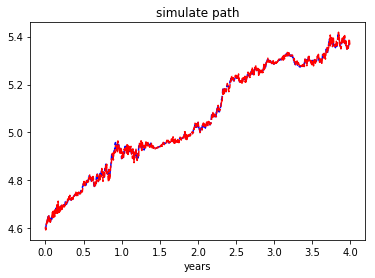

In [190]:
years = np.arange(y.shape[-1]-1) * (1/250)
plt.plot(years, y[0,1:].T, 'b--')
plt.plot(years, obs[1:], 'r--')
plt.title('simulate path')
plt.xlabel('years')
plt.show()

# neg vol: [[24]]


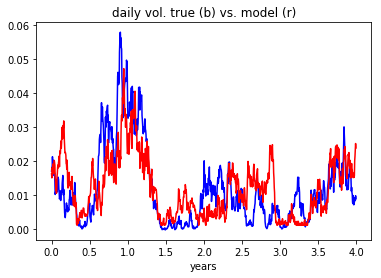

In [191]:
print("# neg vol:", sum(y[1,1:].T<0))
plt.plot(years[:], np.array(y[1,1:])[0], 'b-')
plt.plot(years[:], hidden[1:], 'r-')
plt.title('daily vol. true (b) vs. model (r)')
plt.xlabel('years')
plt.show()

([array([494., 198., 109.,  60.,  46.,  37.,  28.,  14.,   7.,   7.]),
  array([182., 183., 154., 125., 106., 103.,  62.,  49.,  26.,  11.])],
 array([-0.00095725,  0.00371655,  0.00839035,  0.01306416,  0.01773796,
         0.02241176,  0.02708556,  0.03175936,  0.03643316,  0.04110696,
         0.04578076]),
 <a list of 2 Lists of Patches objects>)

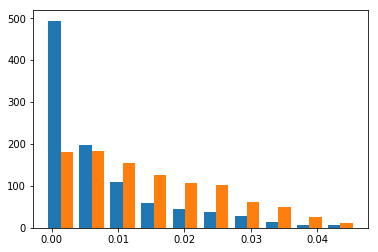

In [282]:
plt.hist([np.array(y[1,1:])[0], hidden])